# Session 9 - Locality Sensitive Hashing

In this sesion we will play with locality sensitive hashing for retrieving the closer image from a dataset of images to a given one.

The dataset consists of handwritten digits [0..9]. Each one is represented as a matrix of greyscale pixels.

In [2]:
import numpy as np

data = np.load('images.npy')
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

We can also plot them as images

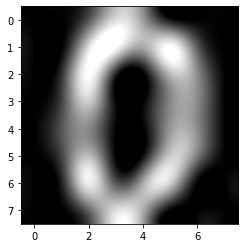

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data[0], cmap=plt.cm.gray, interpolation="lanczos")

You have available the implementation of a class that computes LSH for this images in the file ```lsh.py```.

As an ilustration, the next cell shows an example of how to retrieve similar images to a given one using LSH for this dataset. 

Function ```search``` has three parameters, $k$ is the number of bytes used in the hash function, $m$ is the number of hash functions used to index the images, $i$ is the number of the image to use for the search.

You can observe the time taken to retrieve the candidate images and the number of candidates as $k$ and $m$ change.

The cell also shows the original image and the first of the candidate images (it does not have to be the closest one).

Your can play a little bit with the parameters. 

Your **next task** is to read the documentation for the session and understand how the ```lsh``` class works. After that you can complete the tasks from section 4 in the documentation.

In [4]:
from lsh import lsh

def plot_first_image(lcand):
    if len(lcand) != 0:
        print("Hamming dist=", np.sum(np.abs(data[i+1500]-data[list(lcand)[0]])))       
        fig = plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(10)
        sp1 = fig.add_subplot(1,2,1)
        sp1.imshow(data[i+1500], cmap=plt.cm.gray, interpolation="lanczos")
        sp1 = fig.add_subplot(1,2,2)
        sp1.imshow(data[list(lcand)[0]], cmap=plt.cm.gray, interpolation="lanczos")
        plt.show()

def search(k, m, i):
    """
    Returns a list of candidates for image i using k bits and m hash funcions
    """
    if i + 1500 < data.shape[0]:
        me = lsh(k, m)
        im = me.data[i+1500]
        cands = me.candidates(im)
        print ("there are %4d candidates for image %4d" % (len(cands), i))
        return(cands)

there are   69 candidates for image    1
CPU times: user 418 ms, sys: 7.61 ms, total: 425 ms
Wall time: 434 ms
Hamming dist= 204.0


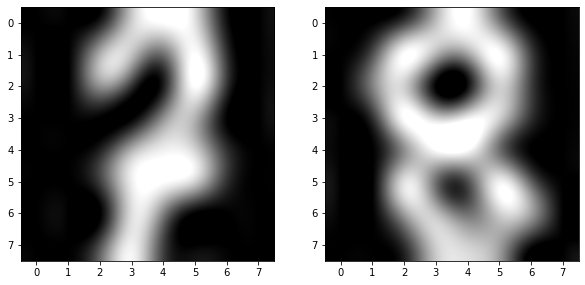

In [41]:
i=1 # The number of image to do the search
%time lcand = search(20,5,i)

plot_first_image(lcand)

there are  230 candidates for image    1
CPU times: user 1.32 s, sys: 21.4 ms, total: 1.35 s
Wall time: 1.5 s
Hamming dist= 174.0


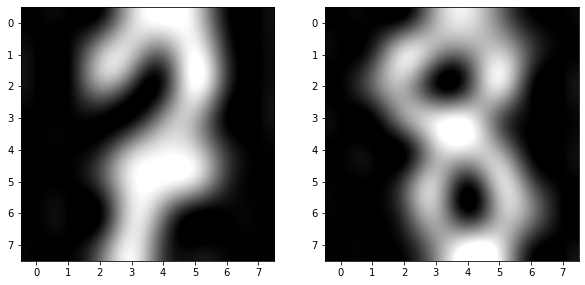

In [6]:
%time lcand = search(20,15,i)

plot_first_image(lcand)

there are    7 candidates for image    1
CPU times: user 865 ms, sys: 16.9 ms, total: 882 ms
Wall time: 1.01 s
Hamming dist= 85.0


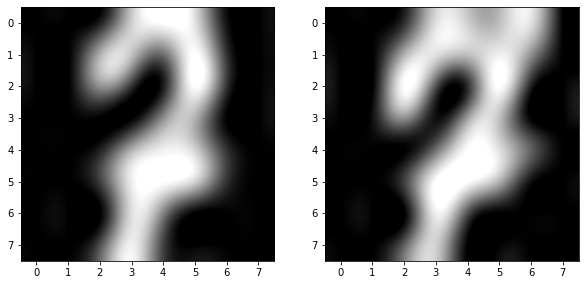

In [7]:
%time lcand = search(40,5,i)

plot_first_image(lcand)

there are    8 candidates for image    1
CPU times: user 2.58 s, sys: 39.6 ms, total: 2.62 s
Wall time: 2.89 s
Hamming dist= 78.0


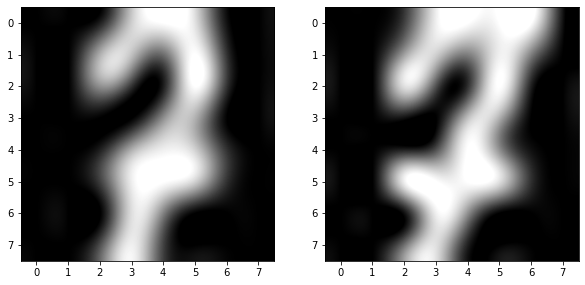

In [8]:
%time lcand = search(40,15,i)

plot_first_image(lcand)

## TO DO

* Write a function that computes the distance between two input images. Use the l1-distance, i.e., the sum of absolute values of differences between pixels in the input images (which, by the way, coincides with the Hamming distance for the representation of images we have chosen).


* Write a function that implements brute-force search, namely, given an input image, compute its distance to all images in the dataset (well, the first 1500) and outputs the one that is closest to it together with the l1-distance value.


* Write a search function that, given an input image, uses the hashes to find the nearest neighbor. Namely, given an input image, invoke the `candidates` function provided, and return the closest image in the candidate set (together with the l1 distance). Notice that depending on the parameters k,m that you chose, you may have no candidates; in this case, your function should return None (python’s null value).

In [10]:
def L1distance(a, b):
    return np.sum(np.abs(a-b))

In [11]:
def brute_force(index_image, data):
    closest_image = None
    min_distance = 1e6
    index = 0
    for i in range(1500):
        if i != index_image:
            d = L1distance(data[index_image], data[i])
            if d < min_distance:
                closest_image = data[i]
                min_distance = d
                index = i
    return closest_image, min_distance

60.0


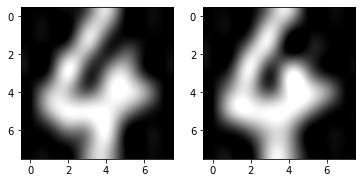

In [72]:
i = 1502 # index of any image
im, dist = brute_force(i, data)
fig = plt.figure()
f1 = fig.add_subplot(1,2,1)
f1.imshow(data[i], cmap=plt.cm.gray, interpolation="lanczos")
f2 = fig.add_subplot(1,2,2)
f2.imshow(im, cmap=plt.cm.gray, interpolation="lanczos")
print(dist)

In [61]:
def closest_of_a_set(im_index, candidates, dataset):
    closest_image_idx = 0
    min_distance = 1e6
    for j in candidates:
        if j != im_index:
            d = L1distance(dataset[im_index], dataset[j])
            if d < min_distance:
                closest_image = dataset[j]
                min_distance = d
                closest_image_idx = j
    return dataset[closest_image_idx], min_distance

In [69]:
def my_search(k, m, index_image, dataset):
    candidates = search(k, m, index_image)
    if candidates is None: return None, None
    return closest_of_a_set(index_image+1500, candidates, dataset)

there are   26 candidates for image    2
60.0


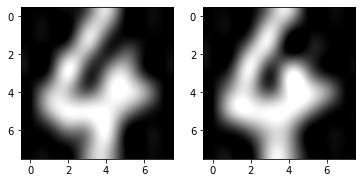

In [71]:
i = 2 # the i-th image of the test set
im, dist = my_search(40, 15, i, data)
i += 1500
if im is not None:
    fig = plt.figure()
    f1 = fig.add_subplot(1,2,1)
    f1.imshow(data[i], cmap=plt.cm.gray, interpolation="lanczos")
    f2 = fig.add_subplot(1,2,2)
    f2.imshow(im, cmap=plt.cm.gray, interpolation="lanczos")
    print(dist)
else:
    print("sorry there are no candidates")

## Comparison

Now we are going to compare both methods in terms of accuracy and time. We know brute force is going to give us the best match, so we will compare if the LSH gives something simialar; then we will compare the computation time.

In [12]:
import time
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()

        print('%r (%r, %r) %2.2f sec' %
              (method.__name__, args, kw, te - ts))
        return result

    return timed

In [13]:
def brute_force_idx(index_image, data):
    closest_image = None
    min_distance = 1e6
    index = 0
    for i in range(1500):
        if i != index_image:
            d = L1distance(data[index_image], data[i])
            if d < min_distance:
                closest_image = data[i]
                min_distance = d
                index = i
    return index, min_distance

def closest_of_a_set_idx(im_index, candidates, dataset):
    closest_image_idx = 0
    min_distance = 1e6
    for j in candidates:
        if j != im_index:
            d = L1distance(dataset[im_index], dataset[j])
            if d < min_distance:
                closest_image = dataset[j]
                min_distance = d
                closest_image_idx = j
    return closest_image_idx, min_distance

def hash_search(k, m, index_image, dataset, candidates):
    if candidates is None: return None, None
    return closest_of_a_set_idx(index_image+1500, candidates, dataset)

In [14]:
n_test_images = data.shape[0]-1500
test_idx = [i for i in range(1, n_test_images)]

In [63]:
K, M = 40, 15
def compare_two_methods(indexes, dataset):
    # first we create a the lsh object
    times = {"brute force":[], "hash":[]}
    distances = {"brute force":[], "hash":[]}
    hashing = lsh(K, M)
    for index in indexes:
        start_time = int(round(time.time() * 1000))
        brute_im, brute_d = brute_force_idx(index+1500, dataset)
        brute_time_diff = int(round(time.time() * 1000)) - start_time
        times["brute force"].append(brute_time_diff)
        distances["brute force"].append(brute_d)

        start_time = int(round(time.time() * 1000))
        candidates = hashing.candidates(dataset[index+1500])
        if len(candidates) != 0:          
            hash_im, hash_d = hash_search(K, M, index, dataset, candidates)
            hash_time_diff = int(round(time.time() * 1000)) - start_time
        
            times["hash"].append(hash_time_diff)
            distances["hash"].append(hash_d)
        #print("With image", index, "from the test set we obtain the next results:")
        #print("Brute force: dist:", brute_d, ", index:", brute_im, ", time:", brute_time_diff)
        #print("Hash method: dist:", hash_d, ", index:", hash_im, ", time:", hash_time_diff)
        #print()
    return times, distances

In [ ]:
ts, dsts  = compare_two_methods(test_idx, data)

In [ ]:
print(len(ts["hash"]), len(ts["brute force"]))
print(len(dsts["hash"]), len(dsts["brute force"]))


In [ ]:
sum(ts["brute force"]), sum(ts["hash"])

In [ ]:
max(dsts["brute force"]), max(dsts["hash"])

In [ ]:
np.mean(dsts["brute force"]), np.mean(dsts["hash"])